Load All Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

upload Data set

In [2]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [3]:
train_df.shape

(42000, 785)

In [4]:
test_df.shape

(28000, 784)

In [5]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [7]:
train_df.skew()

label         0.026479
pixel0        0.000000
pixel1        0.000000
pixel2        0.000000
pixel3        0.000000
               ...    
pixel779    145.149671
pixel780      0.000000
pixel781      0.000000
pixel782      0.000000
pixel783      0.000000
Length: 785, dtype: float64

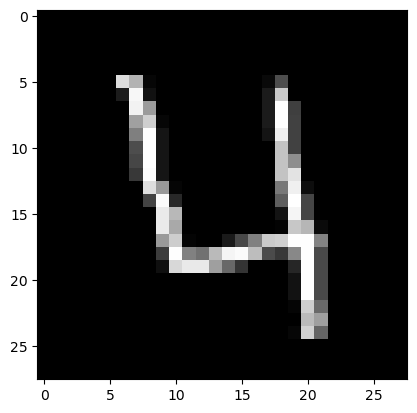

In [8]:
features = ["pixel{}".format(pixel_num) for pixel_num in range(0,784)]
rows_to_examine = 3
image_data = np.reshape(train_df[features][rows_to_examine:rows_to_examine+1].to_numpy(), (28,28))
plt.imshow(image_data, cmap = 'gray')

Model process

In [4]:
x=train_df.drop('label',axis=1)
y=train_df['label']

In [10]:
x.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=123)

In [12]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(33600, 784)
(8400, 784)
(33600,)
(8400,)


In [6]:
def report(actual,pred):
    acc_score=accuracy_score(actual,pred)
    con_mat=confusion_matrix(actual,pred)
    class_rep=classification_report(actual,pred)
    print("Accuracy of model is", round((acc_score*100),2),'%')
    print('\n ',con_mat)
    print('\n',class_rep)

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(xtrain,ytrain)
pred_train_xgb=xgb.predict(xtrain)
pred_test_xgb=xgb.predict(xtest)

In [ ]:
report(ytrain,pred_train_xgb)
report(ytest,pred_test_xgb)

Accuracy of model is 100.0 %

  [[3347    0    0    0    0    0    0    0    0    0]
 [   0 3735    0    0    0    0    0    0    0    0]
 [   0    0 3339    0    0    0    0    0    0    0]
 [   0    0    0 3493    0    0    0    0    0    0]
 [   0    0    0    0 3276    0    0    0    0    0]
 [   0    0    0    0    0 2995    0    0    0    0]
 [   0    0    0    0    0    0 3267    0    0    0]
 [   0    0    0    0    0    0    0 3541    0    0]
 [   0    0    0    0    0    0    0    0 3246    0]
 [   0    0    0    0    0    0    0    0    0 3361]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3347
           1       1.00      1.00      1.00      3735
           2       1.00      1.00      1.00      3339
           3       1.00      1.00      1.00      3493
           4       1.00      1.00      1.00      3276
           5       1.00      1.00      1.00      2995
           6       1.00      1.00      1.00      3267
  

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=50,max_depth=10)
rf.fit(xtrain,ytrain)
pred_train_rf=rf.predict(xtrain)
pred_test_rf=rf.predict(xtest)

In [ ]:
report(ytrain,pred_train_rf)
report(ytest,pred_test_rf)

Accuracy of model is 96.99 %

  [[3320    0    0    1    1    1    7    0   16    1]
 [   0 3694   12    7    5    0    4    7    3    3]
 [   2   13 3245    4   22    0    4   28   14    7]
 [   1   13   34 3339    2   17    4   28   30   25]
 [   2    5    0    0 3145    1   14    6    3  100]
 [   7   17    0   17    3 2915   11    3   11   11]
 [   8    9    1    0    7    7 3225    0   10    0]
 [   0   18   31    2   19    2    0 3391    6   72]
 [   1   34    4   14    9    4    4    5 3127   44]
 [   9   17    5   48   31    6    1   38   19 3187]]

               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3347
           1       0.97      0.99      0.98      3735
           2       0.97      0.97      0.97      3339
           3       0.97      0.96      0.96      3493
           4       0.97      0.96      0.96      3276
           5       0.99      0.97      0.98      2995
           6       0.99      0.99      0.99      3267
  

In [ ]:
slp=Perceptron(verbose=1)
slp.fit(xtrain,ytrain)
pred_train_slp=slp.predict(xtrain)
pred_test_slp=slp.predict(xtest)
report(ytrain,pred_train_slp)
report(ytest,pred_test_slp)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 33680.40, NNZs: 599, Bias: -92.000000, T: 33600, Avg. loss: 46817.951667
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 42819.49, NNZs: 607, Bias: -161.000000, T: 67200, Avg. loss: 41184.869077
Total training time: 0.10 seconds.
-- Epoch 3
Norm: 48607.75, NNZs: 614, Bias: -222.000000, T: 100800, Avg. loss: 36891.702232
Total training time: 0.15 seconds.
-- Epoch 4
Norm: 54442.08, NNZs: 625, Bias: -281.000000, T: 134400, Avg. loss: 35999.461042
Total training time: 0.20 seconds.
-- Epoch 5
Norm: 58608.01, NNZs: 631, Bias: -333.000000, T: 168000, Avg. loss: 37009.589702
Total training time: 0.28 seconds.
-- Epoch 6
Norm: 61946.25, NNZs: 635, Bias: -383.000000, T: 201600, Avg. loss: 34799.316220
Total training time: 0.35 seconds.
-- Epoch 7
Norm: 65207.63, NNZs: 637, Bias: -432.000000, T: 235200, Avg. loss: 36238.479613
Total training time: 0.40 seconds.
-- Epoch 8
Norm: 68995.89, NNZs: 639, Bias: -476.000000, T: 268800, Avg. loss: 34062.205625
Total training time: 0

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    7.1s finished


Accuracy of model is 88.58 %

  [[3197    0   14    5    2   31   70    1   25    2]
 [   1 3556   20    9    2    5    4    4  130    4]
 [  18    9 2961   70    9   24   34   16  193    5]
 [  19   10   83 3022    1  142   27   16  152   21]
 [   5    8  123   17 2912   19   38   17  103   34]
 [  27    3   16   78   19 2525   96    7  194   30]
 [  13    5   28    3    5   45 3122    0   46    0]
 [   7    6  134   17    7    7    6 3269   40   48]
 [  18   20   38   53    8   92   17   10 2978   12]
 [  19   15  120   63  188  119    8  298  309 2222]]

               precision    recall  f1-score   support

           0       0.96      0.96      0.96      3347
           1       0.98      0.95      0.97      3735
           2       0.84      0.89      0.86      3339
           3       0.91      0.87      0.88      3493
           4       0.92      0.89      0.91      3276
           5       0.84      0.84      0.84      2995
           6       0.91      0.96      0.93      3267
  

In [ ]:
mlp=MLPClassifier(hidden_layer_sizes=(128,128,128),max_iter=260,verbose=1)
mlp.fit(xtrain,ytrain)
pred_train_mlp=mlp.predict(xtrain)
pred_test_mlp=mlp.predict(xtest)
report(ytrain,pred_train_mlp)
report(ytest,pred_test_mlp)

Iteration 1, loss = 2.33109059
Iteration 2, loss = 0.46127174
Iteration 3, loss = 0.26788840
Iteration 4, loss = 0.16287535
Iteration 5, loss = 0.11070795
Iteration 6, loss = 0.08891019
Iteration 7, loss = 0.06785008
Iteration 8, loss = 0.06408792
Iteration 9, loss = 0.07015629
Iteration 10, loss = 0.07881556
Iteration 11, loss = 0.07688749
Iteration 12, loss = 0.06330748
Iteration 13, loss = 0.06207854
Iteration 14, loss = 0.06494021
Iteration 15, loss = 0.05556917
Iteration 16, loss = 0.06345931
Iteration 17, loss = 0.06586697
Iteration 18, loss = 0.07401417
Iteration 19, loss = 0.05924441
Iteration 20, loss = 0.05359633
Iteration 21, loss = 0.03926608
Iteration 22, loss = 0.06188752
Iteration 23, loss = 0.06292224
Iteration 24, loss = 0.05573255
Iteration 25, loss = 0.04906960
Iteration 26, loss = 0.04415830
Iteration 27, loss = 0.02563503
Iteration 28, loss = 0.03378517
Iteration 29, loss = 0.03449513
Iteration 30, loss = 0.06572877
Iteration 31, loss = 0.05691705
Iteration 32, los

## Implementation using Tensorflow

Load the Tensorflow Libraries

In [7]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import SGD, Adam
from keras.losses import CategoricalCrossentropy
from tensorflow.keras.utils import to_categorical

Declaring Model

In [8]:
model=Sequential()

Creating Layers

In [9]:
model.add(Dense(512,activation='relu',input_dim=784))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                5

Comile the model

In [11]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

Fit the model

In [12]:
y_train_ohe=to_categorical(ytrain)
y_test_ohe=to_categorical(ytest)

In [13]:
print(y_train_ohe.shape)
print(ytrain.shape)

(33600, 10)
(33600,)


In [14]:
y_train_ohe

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [15]:
ytrain

40572    2
20883    9
3479     2
34084    1
2067     5
        ..
7763     0
15377    7
17730    9
28030    6
15725    7
Name: label, Length: 33600, dtype: int64

In [16]:
hist=model.fit(xtrain,y_train_ohe,validation_data=(xtest,y_test_ohe),epochs=100,batch_size=64,verbose=2)

Epoch 1/100
525/525 - 25s - loss: 2.5229 - accuracy: 0.8201 - val_loss: 0.2476 - val_accuracy: 0.9320 - 25s/epoch - 47ms/step
Epoch 2/100
525/525 - 18s - loss: 0.3648 - accuracy: 0.9033 - val_loss: 0.2157 - val_accuracy: 0.9386 - 18s/epoch - 34ms/step
Epoch 3/100
525/525 - 19s - loss: 0.2661 - accuracy: 0.9259 - val_loss: 0.1766 - val_accuracy: 0.9511 - 19s/epoch - 36ms/step
Epoch 4/100
525/525 - 19s - loss: 0.2311 - accuracy: 0.9366 - val_loss: 0.1703 - val_accuracy: 0.9554 - 19s/epoch - 36ms/step
Epoch 5/100
525/525 - 20s - loss: 0.2031 - accuracy: 0.9416 - val_loss: 0.1625 - val_accuracy: 0.9555 - 20s/epoch - 38ms/step
Epoch 6/100
525/525 - 20s - loss: 0.1879 - accuracy: 0.9468 - val_loss: 0.1587 - val_accuracy: 0.9581 - 20s/epoch - 38ms/step
Epoch 7/100
525/525 - 20s - loss: 0.1762 - accuracy: 0.9508 - val_loss: 0.1634 - val_accuracy: 0.9577 - 20s/epoch - 37ms/step
Epoch 8/100
525/525 - 20s - loss: 0.1705 - accuracy: 0.9522 - val_loss: 0.1653 - val_accuracy: 0.9568 - 20s/epoch - 37

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                5

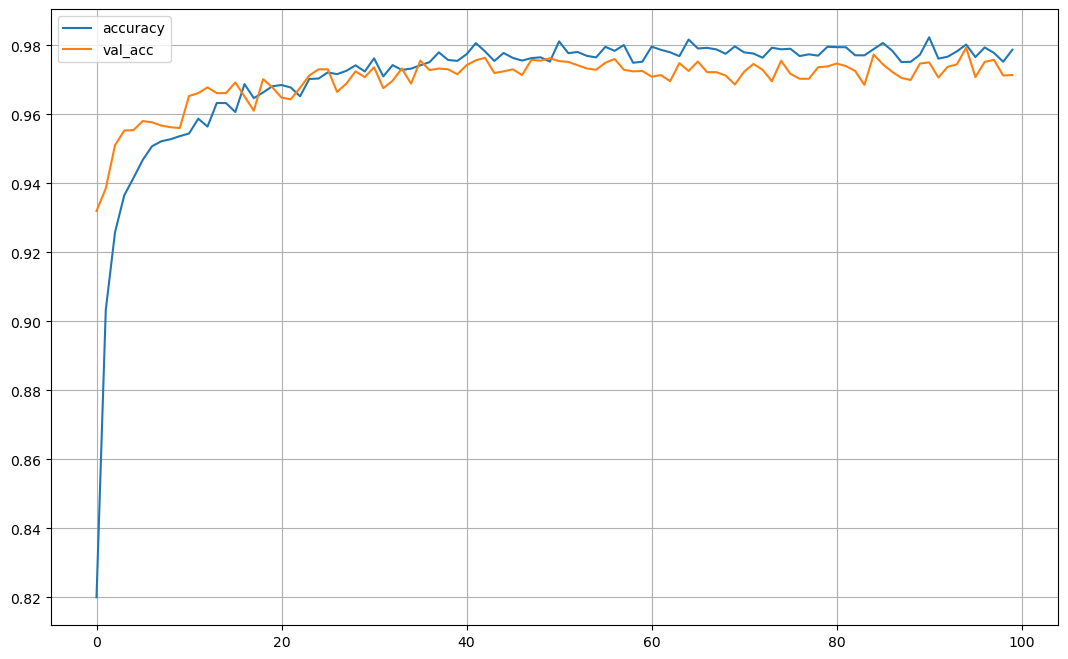

In [18]:
plt.figure(figsize=(13,8))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['accuracy','val_acc'])
plt.grid()

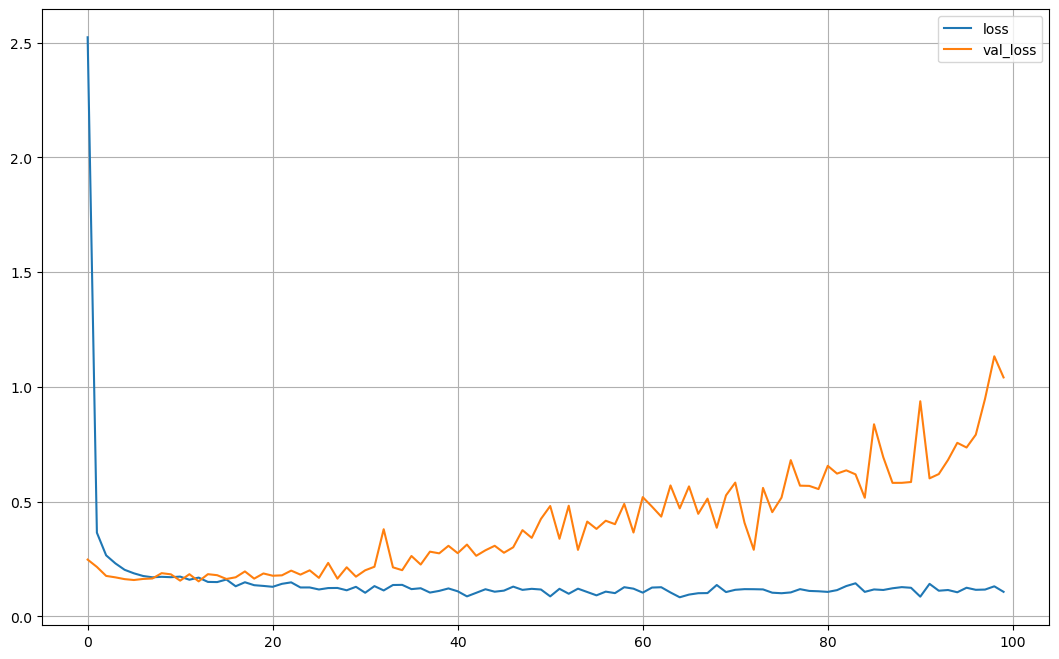

In [19]:
plt.figure(figsize=(13,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.grid()

In [20]:
pred_y_train=model.predict(xtrain)
pred_y_test=model.predict(xtest)

263/263 [==============================] - 2s 6ms/step


In [23]:
pred_y_train[0]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [26]:
np.argmax(pred_y_train[0],axis=0)

2

In [27]:
preds_y_train=np.argmax(pred_y_train,axis=1)
preds_y_test=np.argmax(pred_y_test,axis=1)
report(ytrain,preds_y_train)
report(ytest,preds_y_test)

Accuracy of model is 99.17 %

  [[3313    0    0    1    2    0    0    0   31    0]
 [   0 3714    0    0    3    0    0    1   15    2]
 [  17    0 3272    1    0    0    0    0   49    0]
 [   0    0    0 3472    1    3    0    1   13    3]
 [   0    1    0    0 3273    0    0    0    2    0]
 [   0    0    0    3    0 2968    2    0   21    1]
 [   2    0    0    0    1    0 3245    0   19    0]
 [   1    0    0    1    0    0    0 3535    4    0]
 [   1    0    0    5    5    2    3    0 3228    2]
 [   0    0    0   11   34    4    0    4    8 3300]]

               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3347
           1       1.00      0.99      1.00      3735
           2       1.00      0.98      0.99      3339
           3       0.99      0.99      0.99      3493
           4       0.99      1.00      0.99      3276
           5       1.00      0.99      0.99      2995
           6       1.00      0.99      1.00      3267
  